Panda gaming data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

data setup:

In [2]:
%matplotlib inline

In [3]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

CSV file of the gaming data

In [4]:
gaming_data = pd.read_csv("clubs-gaming-machine-report-by-lga.csv")
print("done")

done


In [5]:
gaming_data.head()

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\r\nGreater Hume,"24,405,524","5,266,934",850,8
1,Armidale\r\nGlen Innes Severn,"5,778,231","788,695",267,7
2,Ballina,"8,496,734","1,451,539",383,7
3,Balranald\r\nCarrathool\r\nCentral Darling,"4,840,075","744,971",202,6
4,Bathurst\r\nBlayney,"5,356,026","894,190",275,7


Columns of the gaming data

In [6]:
gaming_data.columns

Index(['LGA', 'Profit', 'Tax', 'Machines', 'Premises Count'], dtype='object')

row of the gaming data

In [7]:
row_one = gaming_data.iloc[1]
row_one

LGA               Armidale\r\nGlen Innes Severn
Profit                                5,778,231
Tax                                     788,695
Machines                                    267
Premises Count                                7
Name: 1, dtype: object

In [8]:
row_one["Tax"]


'788,695'

In [9]:
row_two = gaming_data.iloc[9]
row_two

LGA                Blacktown
Profit            37,381,922
Tax                7,812,098
Machines               2,079
Premises Count            11
Name: 9, dtype: object

In [10]:
row_two["Tax"]

'7,812,098'

In [11]:
gaming_data.head(3)

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\r\nGreater Hume,"24,405,524","5,266,934",850,8
1,Armidale\r\nGlen Innes Severn,"5,778,231","788,695",267,7
2,Ballina,"8,496,734","1,451,539",383,7


In [12]:
gaming_data.describe()

,Premises Count
count,95.000000
mean,10.863158
std,6.967417
min,5.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,36.000000


In [13]:
print(gaming_data.LGA)

0                         Albury\r\nGreater Hume
1                  Armidale\r\nGlen Innes Severn
2                                        Ballina
3     Balranald\r\nCarrathool\r\nCentral Darling
4                            Bathurst\r\nBlayney
                         ...                    
90                                  Warrumbungle
91                                      Waverley
92                                 Wingecarribee
93                                   Wollondilly
94                                    Wollongong
Name: LGA, Length: 95, dtype: object


<AxesSubplot:>

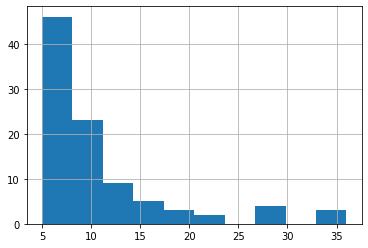

In [14]:
gaming_data["Premises Count"].hist()

In [15]:
gaming_data['Machines']

0       850
1       267
2       383
3       202
4       275
      ...  
90       96
91      369
92      313
93      167
94    2,156
Name: Machines, Length: 95, dtype: object

In [16]:
gaming_data['Machines'].value_counts()

279      2
237      2
850      1
1,224    1
300      1
        ..
139      1
177      1
93       1
80       1
2,156    1
Name: Machines, Length: 93, dtype: int64

In [17]:
gaming_data["Premises Count"]

0      8
1      7
2      7
3      6
4      7
      ..
90    10
91     6
92     7
93     5
94    35
Name: Premises Count, Length: 95, dtype: int64

In [18]:
gaming_data.sort_values("Tax")

,LGA,Profit,Tax,Machines,Premises Count
51,Kyogle,"114,952",-,42,5
90,Warrumbungle,"664,337",-,96,10
42,Gwydir\r\nUralla\r\nWalcha,"952,863",-,95,10
16,Cabonne,"871,085",-,92,11
39,Goulburn Mulwaree\r\nUpper Lachlan,"6,884,021","1,058,053",385,7
...,...,...,...,...,...
4,Bathurst\r\nBlayney,"5,356,026","894,190",275,7
91,Waverley,"4,885,521","912,744",369,6
22,Cessnock,"7,508,814","916,725",533,12
6,Bega Valley,"7,721,981","920,028",488,11


In [40]:
clubs_no1=gaming_data.sort_values(["Premises Count","LGA"],ascending=[True,False]).head(10)
clubs_no1

,LGA,Profit,Tax,Machines,Premises Count
93,Wollondilly,"841,053","24,090",167,5
70,Orange,"7,945,998","1,497,765",300,5
64,Muswellbrook,"3,831,844","540,037",170,5
62,Mosman\r\nNorth Sydney,"5,158,368","852,954",381,5
51,Kyogle,"114,952",-,42,5
37,Forbes\r\nWeddin,"1,348,110","136,600",102,5
33,Edward River\r\nHay,"2,509,625","281,827",178,5
27,Coonamble\r\nGilgandra,"1,890,093","192,519",93,5
26,Coolamon\r\nJunee,"903,605","73,140",80,5
17,Camden,"7,916,543","1,408,749",450,5


In [43]:
x1_axis=clubs_no1.iloc[:,0]
x1_axis

93               Wollondilly
70                    Orange
64              Muswellbrook
62    Mosman\r\nNorth Sydney
51                    Kyogle
37          Forbes\r\nWeddin
33       Edward River\r\nHay
27    Coonamble\r\nGilgandra
26         Coolamon\r\nJunee
17                    Camden
Name: LGA, dtype: object

In [47]:
y1_axis=clubs_no1.iloc[:,4]
y1_axis

93    5
70    5
64    5
62    5
51    5
37    5
33    5
27    5
26    5
17    5
Name: Premises Count, dtype: int64

) missing from current font.ckages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


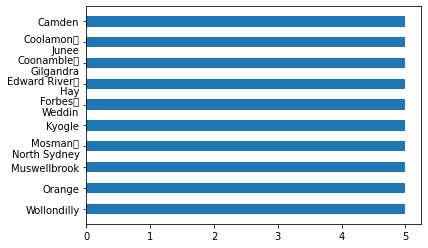

In [51]:
plt.barh(x1_axis,y1_axis,height=0.5)
plt.show()

In [36]:
club_no=gaming_data.sort_values(["Premises Count","LGA"],ascending=[False,False]).head(10)
club_no

,LGA,Profit,Tax,Machines,Premises Count
21,Central Coast,"48,423,291","7,556,742","3,587",36
94,Wollongong,"26,318,771","3,687,584","2,156",35
52,Lake Macquarie,"26,199,449","3,592,350","1,858",33
68,Newcastle,"31,846,408","5,836,602","1,937",29
20,Canterbury-Bankstown,"79,269,903","16,630,822","3,852",29
69,Northern Beaches,"22,138,516","3,764,853","1,691",28
59,Mid-Coast,"18,877,112","2,298,974","1,076",28
84,Sutherland,"18,523,923","2,666,112","1,512",23
81,Shoalhaven,"23,408,835","3,214,255","1,387",23
77,Randwick\r\nWoollahra,"12,315,949","2,001,249",973,20


In [37]:
x_axis=club_no.iloc[:,0]
x_axis

21            Central Coast
94               Wollongong
52           Lake Macquarie
68                Newcastle
20     Canterbury-Bankstown
69         Northern Beaches
59                Mid-Coast
84               Sutherland
81               Shoalhaven
77    Randwick\r\nWoollahra
Name: LGA, dtype: object

In [38]:
y_axis=club_no.iloc[:,4]
y_axis

21    36
94    35
52    33
68    29
20    29
69    28
59    28
84    23
81    23
77    20
Name: Premises Count, dtype: int64

) missing from current font.ckages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


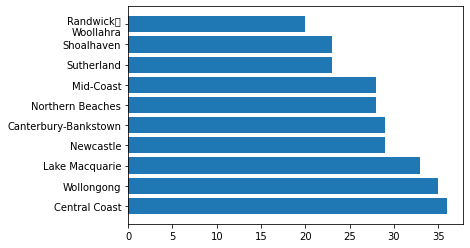

In [39]:
plt.barh(x_axis,y_axis)
plt.show()

Frequency of the numbers of clubs in LGA specified

<AxesSubplot:>

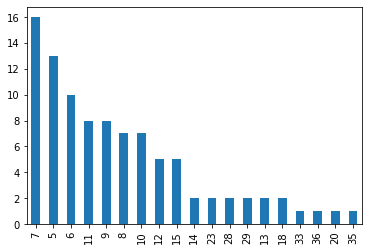

In [24]:
gaming_data["Premises Count"].value_counts().plot(kind="bar")

In [25]:
gaming_data.sort_values(["Machines","Profit"]).head(30)

,LGA,Profit,Tax,Machines,Premises Count
5,Bayside,"13,782,049","2,055,160","1,058",18
56,Liverpool,"19,958,862","3,854,162","1,067",8
59,Mid-Coast,"18,877,112","2,298,974","1,076",28
72,Parramatta,"20,839,563","3,881,430","1,224",11
81,Shoalhaven,"23,408,835","3,214,255","1,387",23
84,Sutherland,"18,523,923","2,666,112","1,512",23
18,Campbelltown,"26,753,479","5,541,031","1,572",10
38,Georges River,"24,838,811","4,260,321","1,598",15
88,Tweed,"27,491,295","4,741,457","1,650",15
69,Northern Beaches,"22,138,516","3,764,853","1,691",28


In [26]:
syd = gaming_data[gaming_data.LGA == "Sydney"]

In [27]:
syd

,LGA,Profit,Tax,Machines,Premises Count
85,Sydney,"6,214,839","939,325",558,8


In [28]:
par = gaming_data[gaming_data.LGA == "Parramatta"]

In [29]:
par

,LGA,Profit,Tax,Machines,Premises Count
72,Parramatta,"20,839,563","3,881,430","1,224",11


Number of Machines in Sydney, Parramatta, and Randwick

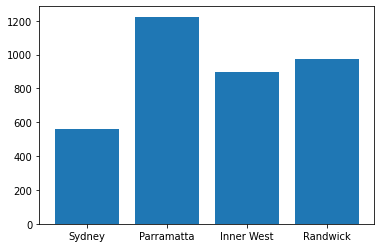

In [30]:
x=["Sydney","Parramatta","Inner West","Randwick"]
y=[558,1224,900,973]
plt.bar(x,y)
plt.show()